# Too Much Commitment 

### For this project, We'll see how worse my mental health will be once I land a job in this lovely industry.

# Not So Interesting EDA

In [1]:

import seaborn as sns
import numpy as np
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import sklearn
import pandas as pd
import researchpy as rp
import scipy.stats as stats


DB_PATH = "E:\mental\mental_health.sqlite"
conn = sqlite3.connect(DB_PATH)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


tech = pd.read_sql(
    """SELECT *
    FROM Answer 
    WHERE UserID IN (SELECT UserID FROM Answer WHERE QuestionID IS 68 AND AnswerText IS 1)""",
        conn)

stigma_df =  pd.read_sql(
    """ SELECT *
        FROM Answer
        WHERE QuestionID IN ("12", "14", "15", "16", "17")
        AND AnswerText IS NOT "-1" """,
        conn)
productivity_df = pd.read_sql(
    """ 
    SELECT *
    FROM Answer
    WHERE QuestionID IS 55 """,
    conn)

#What was the reason to make these df here in this cell?




In [4]:
tech.head()

,AnswerText,SurveyID,UserID,QuestionID
0,31,2017,2695,1
1,36,2017,2696,1
2,30,2017,2699,1
3,36,2017,2700,1
4,38,2017,2701,1


In [2]:
df = pd.read_sql(
    """ 
    SELECT *
    FROM Answer 
    ;""",
    conn)
df_questions = pd.read_sql(
    """ 
    SELECT *
    FROM Question 
    ;""",
    conn)
df_survey = pd.read_sql(
    """ 
    SELECT *
    FROM Survey 
    ;""",
    conn)

# Again, why?

In [6]:
df_survey.SurveyID.value_counts().to_frame()

,SurveyID
2014,1
2016,1
2017,1
2018,1
2019,1


In [10]:
pd.read_sql("""SELECT SurveyID, COUNT(DISTINCT SurveyID) count FROM Answer GROUP BY SurveyID""", conn)

,SurveyID,count
0,2014,1
1,2016,1
2,2017,1
3,2018,1
4,2019,1


In [6]:
df_questions.head()

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5


In [7]:
df_questions.shape

(105, 2)

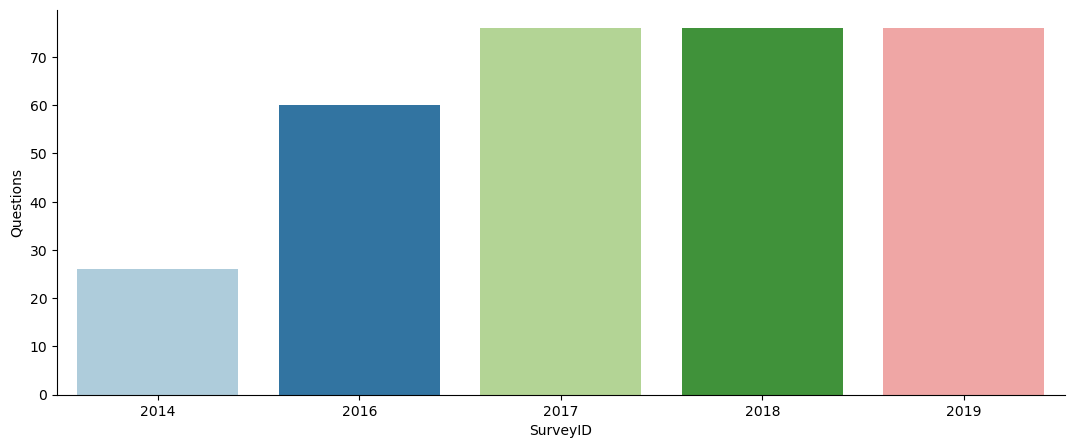

In [44]:
surveyid = pd.read_sql(
    """
    SELECT COUNT(DISTINCT(QuestionID)) as Questions, SurveyID, COUNT(DISTINCT(UserID)) as Users
    FROM Answer
    GROUP BY SurveyID""", conn)

surveyid

plt.figure(figsize=(13,5))
g = sns.barplot(y="Questions", x="SurveyID", data=surveyid, palette="Paired" )
#g.legend_.remove()
sns.despine()



plt.show()
# There is no title. Why did you use hue? It made plot worse ...

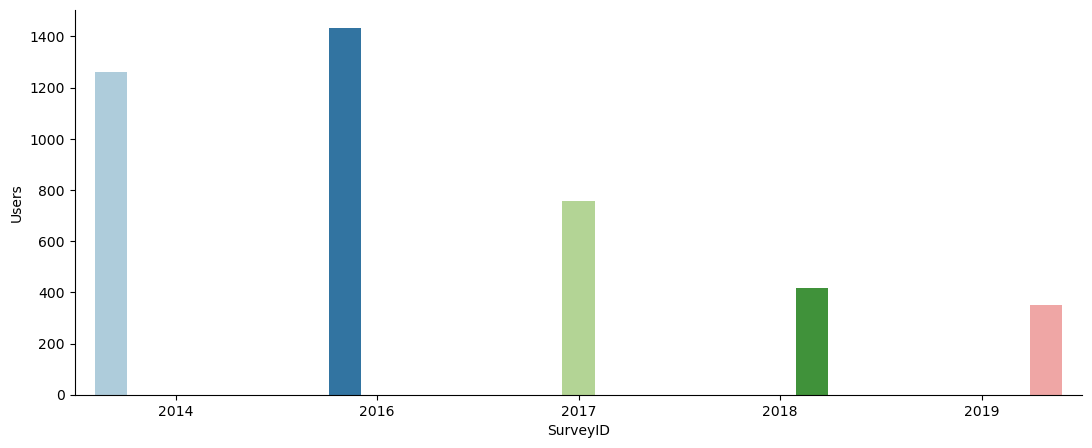

In [9]:
plt.figure(figsize=(13,5))
g = sns.barplot(hue="SurveyID",y="Users", x="SurveyID", data=surveyid, palette="Paired" )
g.legend_.remove()
sns.despine()



plt.show()
# Same, no title and no need for hue

# More Interesing EDA

<br />Question #54 states:<br />
<br />
Do you believe your productivity is ever affected by a mental health issue?</p>


<br />Question #55 states:
<br />


If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?

In [42]:
questions = pd.read_sql(
    """ 
    SELECT *
        FROM Answer
        WHERE QuestionID IN ("12", "14", "15", "16", "17", "55")
        AND AnswerText IS NOT "-1" """,conn)

questions[questions['QuestionID'] == 55]['AnswerText'].value_counts().to_frame()

,AnswerText
1-25%,164
26-50%,125
51-75%,53
76-100%,25


Questions 12, 14 15, 16 and 17 state:

--12 Would you bring up a mental health issue with a potential employer in an interview?

-- 14 Do you know the options for mental health care available under your employer-provided health coverage?

--15 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?

--16 Does your employer offer resources to learn more about mental health disorders and options for seeking help?

--17 If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?



# (SQUAD) GOALS

### Formulating Null_Hypothesis

Using these questions and a $\tilde{\chi}^2$ test, I form the following:

In [31]:
Null_Hypothesis = ["Mental health stigma has no impact on overall mental health in the workforce?"]
# To be honest I don't understand it. Maybe I will after presentation

What does this means you say? Easy. I want to know if a positive mental health corporate culture translate into higher employee mental health. 
How will reject or fail to reject the NH?
Do the following features correlate into better or worse employee mental health:

* How to avoid a mental health emergency? (ease of accesing help or preventive measures)



* How are mental health issues perceived in the company (how openly mental health is discussed amongst employees, supervisors and in interview process)


* Overall employee productivity / satisfaction

We fail to reject the null hypothesis if theres correlation with these features and overall productivity and mental health in the workforce. 

In [52]:
tech_work = pd.read_sql(
    """ 
    SELECT *
    FROM Answer 
    WHERE UserID IN (SELECT UserID FROM Answer WHERE QuestionID IS 68 AND AnswerText IS 1);""",
    conn)

questions_df = tech_work[tech_work['QuestionID'].isin([12, 14, 15, 16, 17])]

tech_work.head()
#OK so only those who work in tech
# and question_df are only question 12 to 17. Could be done with sql ...

,AnswerText,SurveyID,UserID,QuestionID
0,31,2017,2695,1
1,36,2017,2696,1
2,30,2017,2699,1
3,36,2017,2700,1
4,38,2017,2701,1


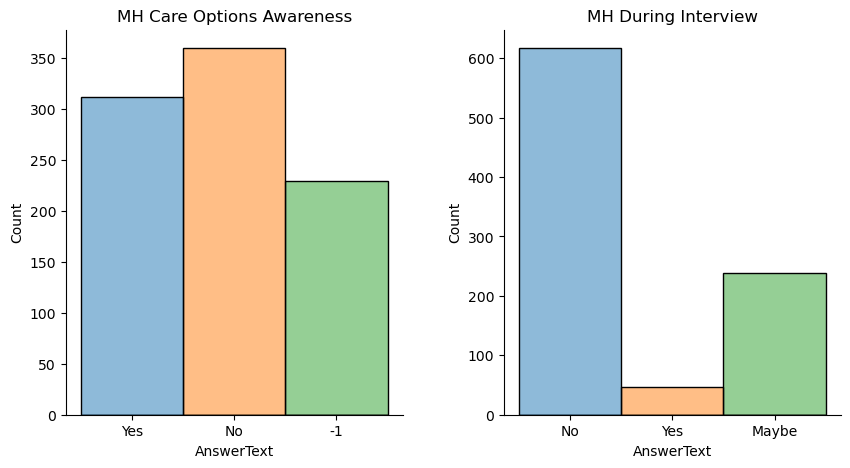

In [24]:
q12 = pd.read_sql(
    """ 
    SELECT *
    FROM Answer 
    WHERE UserID IN (SELECT UserID FROM Answer WHERE QuestionID IS 68 AND AnswerText IS 1)
    AND QuestionID is 12;""",
    conn)
#---------------------------------------------------
#Wait. What was question_df created for?
q12 = q12['AnswerText'].to_frame()


q14 = pd.read_sql(
    """ 
    SELECT *
    FROM Answer 
    WHERE UserID IN (SELECT UserID FROM Answer WHERE QuestionID IS 68 AND AnswerText IS 1)
    AND QuestionID is 14;""",
    conn)


q14 = q14['AnswerText'].to_frame()




fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.3)

sns.histplot(ax=ax[0],
             hue=q14['AnswerText'],
             data=q14,
             legend=False,             
            x=q14['AnswerText']
            )
ax[0].set_title('MH Care Options Awareness')
sns.despine()

sns.histplot(ax=ax[1],
    hue=q12['AnswerText'],
             data=q12,
             legend=False,
            x=q12['AnswerText']
            )

ax[1].set_title('MH During Interview')
sns.despine()
plt.show()
#-------------------------------------------
# ok This is unusual for me use of histplot :-) Would be even better if used stat='percent',
# then a proportion would be seen instead of count


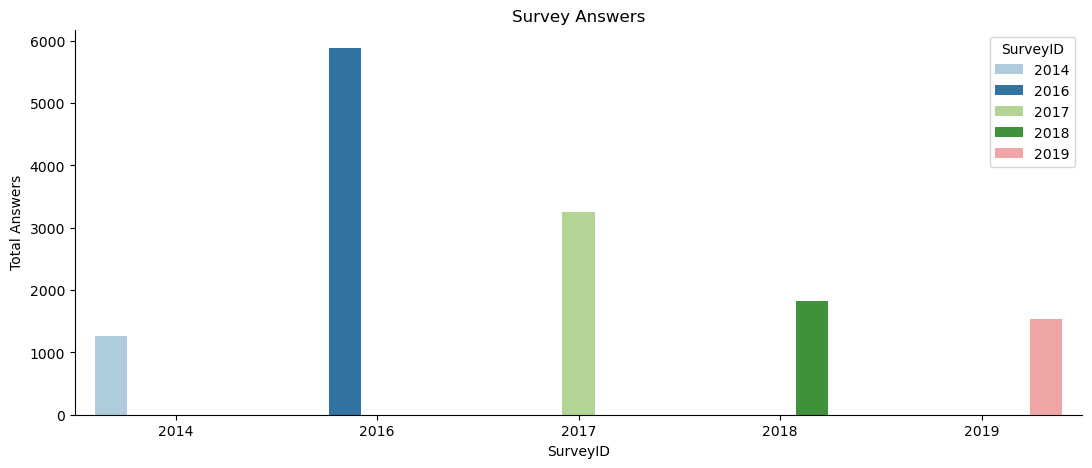

In [28]:
survey_df_graph = stigma_df.groupby("SurveyID").count().reset_index()
plt.figure(figsize=(13,5))
sns.barplot(hue = "SurveyID",y="AnswerText", x="SurveyID" ,data=survey_df_graph, palette="Paired").set(ylabel = "Total Answers",title='Survey Answers')
plt.ticklabel_format(style='plain', axis='y')
sns.despine()
plt.show()
# hue is not needed, only messed the placement of tick marks on x 

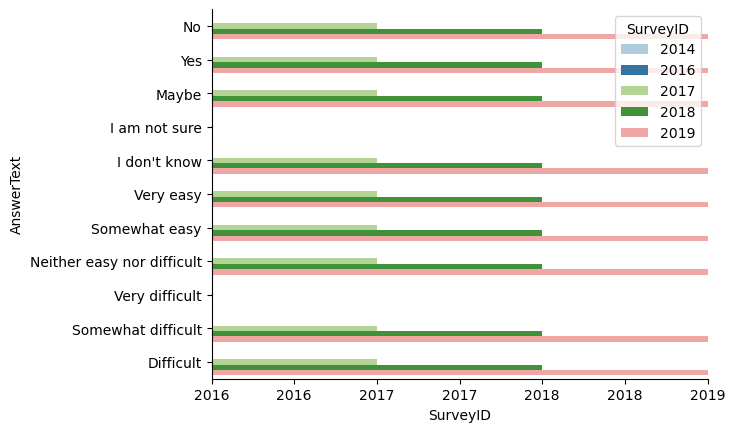

In [33]:
fig, ax = plt.subplots()
sns.barplot(hue = "SurveyID", y="AnswerText", x="SurveyID" ,data=stigma_df[['AnswerText','SurveyID']], palette="Paired")
ax.set_xlim(2016, 2019)
sns.despine()
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.show()
#-------------------------------------------------------------------
# I am not sure what I am looking at here ... 
# Should have used countplot instead I guess
# Forgot the title
# the legend is covering the bars

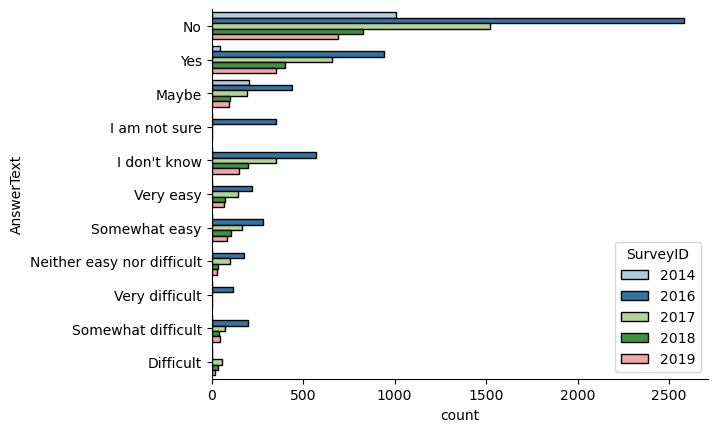

In [4]:
fig, ax = plt.subplots()
sns.countplot(hue = "SurveyID", y="AnswerText",
              data=stigma_df[['AnswerText','SurveyID']],
              palette="Paired",
             edgecolor="black")
sns.despine()

plt.show()
#-------------------------------------------------------------------
# I think this is what it was supposed to be
# now you realy have counts on x. 


In [42]:
df.tail()

,AnswerText,SurveyID,UserID,QuestionID
2953,0,2019,4214,55
2954,1,2019,4215,55
2955,0,2019,4216,55
2956,0,2019,4217,55
2957,0,2019,4218,55


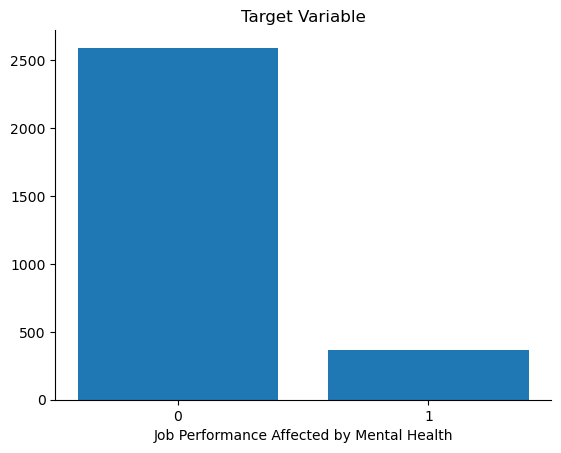

In [3]:



productivity_df['AnswerText'] = productivity_df['AnswerText'].apply(lambda x: "0" if x == "-1" else '1')
df = pd.concat([stigma_df, productivity_df], axis=0)




fig, ax = plt.subplots()

ax.bar(
        list(productivity_df[productivity_df['QuestionID'] == 55]['AnswerText'].value_counts().index),
        list(productivity_df[productivity_df['QuestionID'] == 55]['AnswerText'].value_counts().values),
       
       linewidth=2.0)
plt.title("Target Variable")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Job Performance Affected by Mental Health')

plt.show()
# Honestly I am not sure what's going on here ... why not just use QuestionID 54?
# as I understand -1 means "no answer", and 0 means No
# I think titles are confusing xlabel should better be title, and xlabel would be better "Answer"

In [25]:
cross = pd.crosstab(df[df["QuestionID"] == 55]["AnswerText"], df[df["QuestionID"] != 55]["AnswerText"])
res = stats.chi2_contingency(cross)
print(res.pvalue, res.statistic)

0.13107584293398178 5.6298380794956735


In [5]:
print(res)

Chi2ContingencyResult(statistic=5.6298380794956735, pvalue=0.13107584293398178, dof=3, expected_freq=array([[  71.82623394,  564.97464503, 1733.46484111,  220.73427992],
       [  10.17376606,   80.02535497,  245.53515889,   31.26572008]]))


In [6]:
crosstab, test_results, expected = rp.crosstab(df[df["QuestionID"] == 55]["AnswerText"], df[df["QuestionID"] != 55]["AnswerText"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab
# ------------------------
# I am not sure if this is ok. df[df["QuestionID"] != 55] is a bunch of questions from 12 to 17 isn't it
# I am not sure if just grouping all them like this answers anything
# Why did you leave both chi tests in the notebook? They do exactly same thing. Why not leave just whichever you think looks nicer

AnswerText                            
AnswerText I am not sure  Maybe     No   Yes     All
AnswerText                                          
0                   2.43  19.30  58.05  7.81   87.59
1                   0.34   2.50   8.86  0.71   12.41
All                 2.77  21.81  66.90  8.52  100.00

In [7]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,5.6298
1,p-value =,0.1311
2,Cramer's V =,0.0436


<span style="color:blue;"> So, I was thinking how I explain why I had problem with chi-square better. It is not about the choice of test itself. It realy is absolutely apropriate for categorical data. But when you throw them in together, they can "hide" each other. I mean, when crosstab counts the frequency of pair "1" - "Yes", you have no idea how many "yes" came from Q12 or Q14. Maybe there is actualy an association between Q55-Q12, but no association between Q55-Q14. So, I wanted to demonstrate it with example. And realised that chi test doesn't even run for Q15-17. If you try this<br>
```
cross = pd.crosstab(df[df["QuestionID"] == 55]["AnswerText"], df[df["QuestionID"] == 15]["AnswerText"])
res = stats.chi2_contingency(cross)
print(res.pvalue, res.statistic)
```
<span style="color:blue;"> You will get an error. I have no idea why. Then I realised that the answers to Q12-Q17 might even have different values. And indeed they do (see cell bellow). But if you look and contingency table, you only see 'I am not sure', 'Maybe', 'No', 'Yes'. So that just further confirms that only Q12 and Q14 were used. I could not understand what's the reason of this. If you do, please let me know
 

In [41]:
print("Answers to no 12:", df[df["QuestionID"]==12]["AnswerText"].unique())
print("Answers to no 14:", df[df["QuestionID"]==14]["AnswerText"].unique())
print("Answers to no 15:", df[df["QuestionID"]==15]["AnswerText"].unique())
print("Answers to no 16:", df[df["QuestionID"]==16]["AnswerText"].unique())
print("Answers to no 17:", df[df["QuestionID"]==17]["AnswerText"].unique())

Answers to no 12: ['No' 'Yes' 'Maybe']
Answers to no 14: ['Yes' 'I am not sure' 'No']
Answers to no 15: ['No' 'Yes' "I don't know"]
Answers to no 16: ['No' 'Yes' "I don't know"]
Answers to no 17: ['Very easy' 'Somewhat easy' 'Neither easy nor difficult' 'Very difficult'
 'Somewhat difficult' "I don't know" 'Difficult']


### Conclusion

the p-value is larger than the significance level, one fails to reject the null hypothesis because there is not enough evidence to conclude that the variables are associated.

*what variables? There is no explanation ..*

# Further Consideration

To build upon this first finding, I would use other questions (besides #55) gauge if there is statistical significance between corporate culture, mental health, and productivity. Additionally, this test does not use the ordinal nature of question #55. There are some other libraries that claim to be able to consider ordinal features amongst nominal variables. 

Another method is also available, a Decision Tree could be tested to see if theres any correlation between these features.

### Sources

https://www.kaggle.com/code/hamelg/python-for-data-25-chi-squared-tests

https://stattrek.com/chi-square-test/independence?utm_content=cmp-true#google_vignette

https://pythonfordatascienceorg.wordpress.com/chi-square-python/